In [1]:
import pandas as pd

In [50]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [51]:
df.drop(['PID','Order'], axis = 1, inplace = True ) #There is no need for PID and order

In [52]:
df.shape

(2930, 80)

In [53]:
columns_with_null_values = df.loc[:,(df.isnull().sum()>0).values].columns.tolist()

In [54]:
df[columns_with_null_values].isnull().sum()

,0
Lot Frontage,490
Alley,2732
Mas Vnr Type,1775
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81


In [55]:
#We drop the features with a lot of null-values
columns_with_null_values_high = df.loc[:,(df.isnull().sum()>200).values].columns.tolist()
columns_with_null_values_high

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Fireplace Qu',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [56]:
df.drop(columns_with_null_values_high, axis = 1, inplace = True)

In [57]:
new = []
for col in columns_with_null_values:
  if col not in columns_with_null_values_high:
    new.append(col)

new

['Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [58]:
columns_with_null_values = new

In [61]:
df[columns_with_null_values].isnull().sum()

,0
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

In [71]:
df['Mas Vnr Area'].replace(np.nan, df['Mas Vnr Area'].mean(), inplace = True)

Correlation: 0.5057840813924535 p-value: 4.0078349455511793e-190


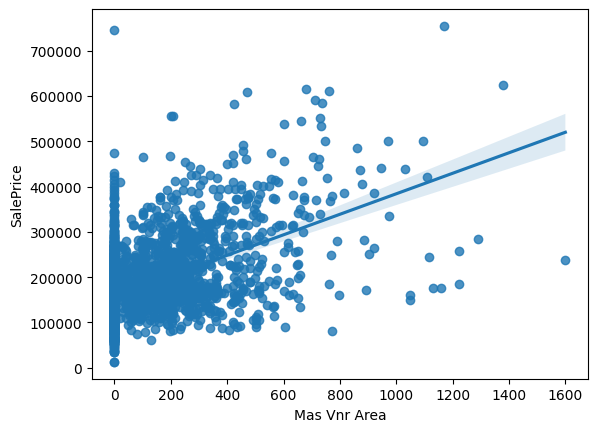

In [73]:
sns.regplot(x="Mas Vnr Area", y="SalePrice", data =df)
corr,p = pearsonr(df['Mas Vnr Area'], df['SalePrice'])
print('Correlation:', corr, 'p-value:', p )

In [75]:
df['Bsmt Qual'].value_counts()

,count
Bsmt Qual,
TA,1283
Gd,1219
Ex,258
Fa,88
Po,2


In [76]:
#We replace the missing values of Bsmt Qual with TA
df['Bsmt Qual'].fillna("TA", inplace = True )
df['Bsmt Qual'].isnull().sum()

np.int64(0)

In [78]:
#We now encode the possible values while mainting the order of quality
df['Bsmt Qual'].replace({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)

/tmp/ipython-input-2933518731.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bsmt Qual'].replace({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)


Correlation: 0.5057840813924535 p-value: 4.0078349455511793e-190


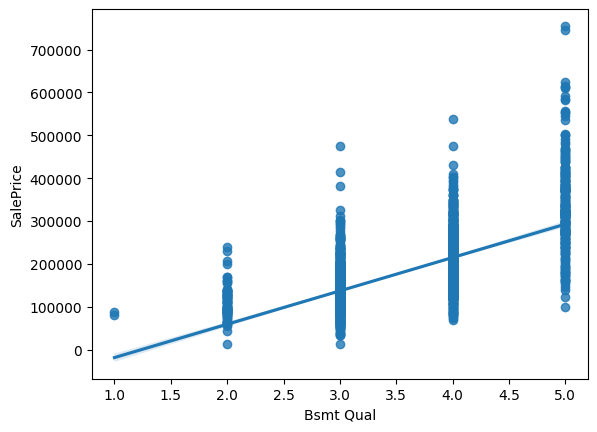

In [81]:
sns.regplot(x="Bsmt Qual", y="SalePrice", data =df)
corr,p = pearsonr(df['Mas Vnr Area'], df['SalePrice'])
print('Correlation:', corr, 'p-value:', p )

<Axes: xlabel='Bsmt Cond', ylabel='SalePrice'>

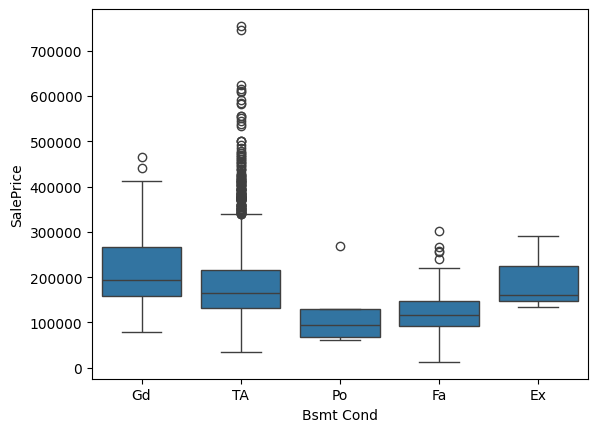

In [82]:
sns.boxplot(data= df, x ='Bsmt Cond', y='SalePrice')

In [83]:
df['Bsmt Cond'].value_counts()

,count
Bsmt Cond,
TA,2616
Gd,122
Fa,104
Po,5
Ex,3


In [85]:
df['Bsmt Cond'].fillna('TA', inplace = True)

/tmp/ipython-input-1579154871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bsmt Cond'].fillna('TA', inplace = True)


In [87]:
df['Bsmt Cond'].replace({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)

/tmp/ipython-input-3777810950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bsmt Cond'].replace({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)


<Axes: xlabel='Bsmt Exposure', ylabel='SalePrice'>

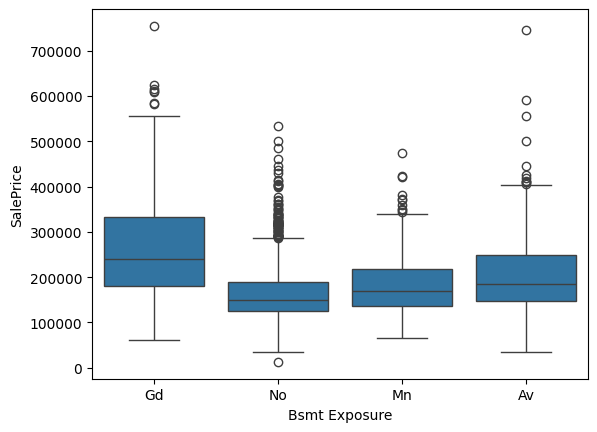

In [86]:
sns.boxplot(data= df, x ='Bsmt Exposure', y='SalePrice')

In [88]:
df.drop('Bsmt Exposure', axis =1, inplace = True)

<Axes: xlabel='BsmtFin Type 2', ylabel='SalePrice'>

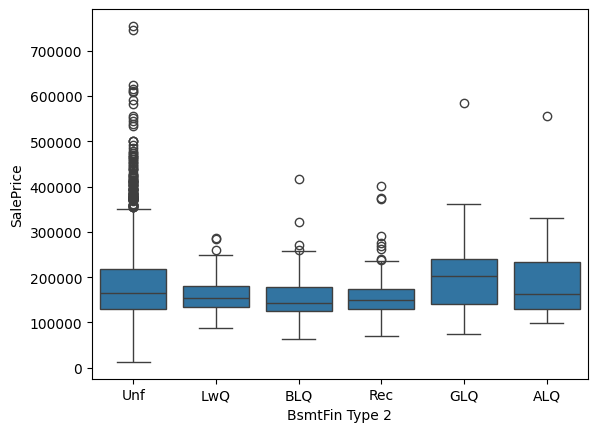

In [91]:
sns.boxplot(data= df, x ='BsmtFin Type 2', y='SalePrice')

In [92]:
df.drop(['BsmtFin Type 1', 'BsmtFin Type 2'], axis =1, inplace = True)

In [96]:
df.loc[:,df.isnull().sum()>0].isnull().sum()

,0
BsmtFin SF 1,1
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1
Electrical,1
Bsmt Full Bath,2
Bsmt Half Bath,2
Garage Type,157
Garage Yr Blt,159
Garage Finish,159


<Axes: xlabel='Garage Cond', ylabel='SalePrice'>

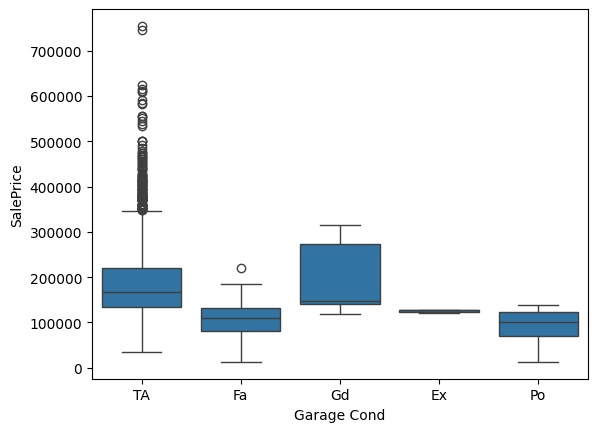

In [101]:
sns.boxplot(data= df, x ='Garage Cond', y='SalePrice')

In [102]:
df.drop(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond'], axis =1 , inplace =True)

In [105]:
columns_with_null_values = df.loc[:,df.isnull().sum()>0].isnull().sum().index.tolist()

In [129]:
for col in columns_with_null_values:
  if df[col].dtypes == ('int' or 'float'):
    df[col].fillna(df[col].mean(), inplace = True)
  else:
    df[col].fillna(df[col].value_counts().idxmax(), inplace = True)


/tmp/ipython-input-707250193.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].value_counts().idxmax(), inplace = True)
/tmp/ipython-input-707250193.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [134]:
df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900


<Axes: xlabel='MS SubClass', ylabel='SalePrice'>

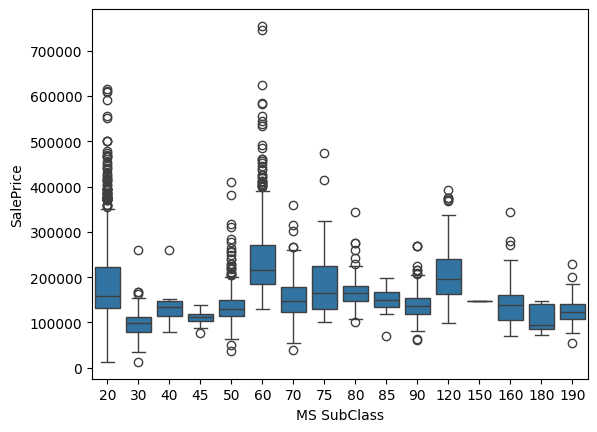

In [135]:
sns.boxplot(data = df, x='MS SubClass', y='SalePrice')

In [141]:
def one_hot_encode(dataf,cat_var):
  datafc=dataf.copy()
  dummy_var=pd.get_dummies(datafc[cat_var])
  dummy_var = dummy_var.astype(int)
  datafc = pd.concat([datafc, dummy_var], axis = 1)
  datafc.drop(cat_var, axis =1 ,inplace =True)
  return datafc

df = one_hot_encode(df, 'MS SubClass')

In [142]:
df.head()

,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,70,75,80,85,90,120,150,160,180,190
0,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0,0,0,0,0,0,0,0,0,0
1,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,0,0,0,0,0,0,0,0,0,0
2,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0,0,0,0,0,0,0,0,0,0
3,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0,0,0,0,0,0,0,0,0,0
4,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Condition 1', ylabel='SalePrice'>

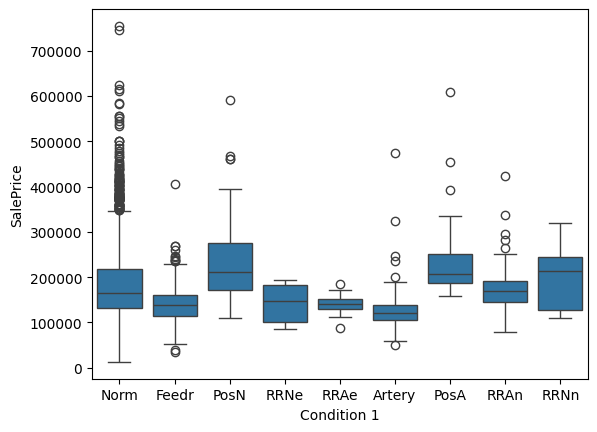

In [152]:
sns.boxplot(data = df, x='Condition 1', y='SalePrice')

In [153]:
df.drop(['Lot Shape','Utilities','Lot Config', 'Land Slope','Condition 1'], axis =1, inplace = True)
df = one_hot_encode(df, 'MS Zoning')
df = one_hot_encode(df, 'Street')
df = one_hot_encode(df, 'Land Contour')
df = one_hot_encode(df, 'Neighborhood')
df.head()


,Lot Area,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,31770,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,...,0,0,0,0,0,0,0,0,0,0
1,11622,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0
2,14267,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,...,0,0,0,0,0,0,0,0,0,0
3,11160,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,...,0,0,0,0,0,0,0,0,0,0
4,13830,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Roof Matl', ylabel='SalePrice'>

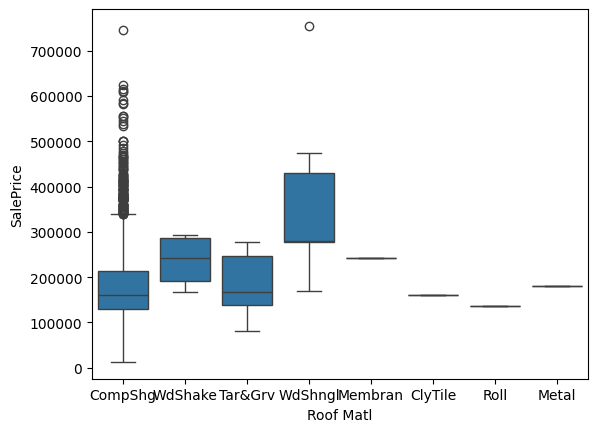

In [158]:
sns.boxplot(data = df, x='Roof Matl', y='SalePrice')

In [159]:
df.drop(['Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl'], axis =1, inplace = True)
df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,31770,6,5,1960,1960,BrkFace,Plywood,112.0,TA,TA,...,0,0,0,0,0,0,0,0,0,0
1,11622,5,6,1961,1961,VinylSd,VinylSd,0.0,TA,TA,...,0,0,0,0,0,0,0,0,0,0
2,14267,6,6,1958,1958,Wd Sdng,Wd Sdng,108.0,TA,TA,...,0,0,0,0,0,0,0,0,0,0
3,11160,7,5,1968,1968,BrkFace,BrkFace,0.0,Gd,TA,...,0,0,0,0,0,0,0,0,0,0
4,13830,5,5,1997,1998,VinylSd,VinylSd,0.0,TA,TA,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Foundation', ylabel='SalePrice'>

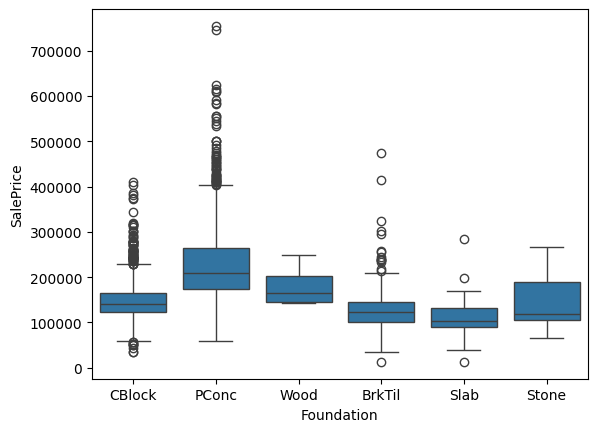

In [168]:
sns.boxplot(data = df, x='Foundation', y='SalePrice')

In [165]:
df.drop(['Exterior 1st','Exterior 1st', 'Exter Cond' ], axis =1, inplace = True)
df['Exter Qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)
df.head()


/tmp/ipython-input-4002333248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exter Qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)
/tmp/ipython-input-4002333248.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exter Qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, in

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 2nd,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,31770,6,5,1960,1960,Plywood,112.0,1,CBlock,3,...,0,0,0,0,0,0,0,0,0,0
1,11622,5,6,1961,1961,VinylSd,0.0,1,CBlock,3,...,0,0,0,0,0,0,0,0,0,0
2,14267,6,6,1958,1958,Wd Sdng,108.0,1,CBlock,3,...,0,0,0,0,0,0,0,0,0,0
3,11160,7,5,1968,1968,BrkFace,0.0,2,CBlock,3,...,0,0,0,0,0,0,0,0,0,0
4,13830,5,5,1997,1998,VinylSd,0.0,1,PConc,4,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df.iloc[:5,40:50]

,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,20,30
0,0,0,0,5,2010,WD,Normal,215000,1,0
1,120,0,0,6,2010,WD,Normal,105000,1,0
2,0,0,12500,6,2010,WD,Normal,172000,1,0
3,0,0,0,4,2010,WD,Normal,244000,1,0
4,0,0,0,3,2010,WD,Normal,189900,0,0


In [173]:
df['Heating QC'].value_counts()

,count
Heating QC,
Ex,1495
TA,864
Gd,476
Fa,92
Po,3


In [184]:
df.drop(['Exterior 2nd', 'Foundation', 'Heating', 'Functional','Sale Condition'], axis =1, inplace = True)
df['Heating QC'].replace({ "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)
df=one_hot_encode(df, 'Central Air')
df=one_hot_encode(df, 'Electrical')
df['Kitchen Qual'].replace({ "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)
df['Paved Drive'].replace({ "N": 0, "P": 1, "Y": 3}, inplace = True)
df=one_hot_encode(df, 'Sale Type')

/tmp/ipython-input-3814651772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heating QC'].replace({ "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace = True)
/tmp/ipython-input-3814651772.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heating QC'].replace({ "Po": 1, "Fa": 2, "T

<Axes: xlabel='Sale Condition', ylabel='SalePrice'>

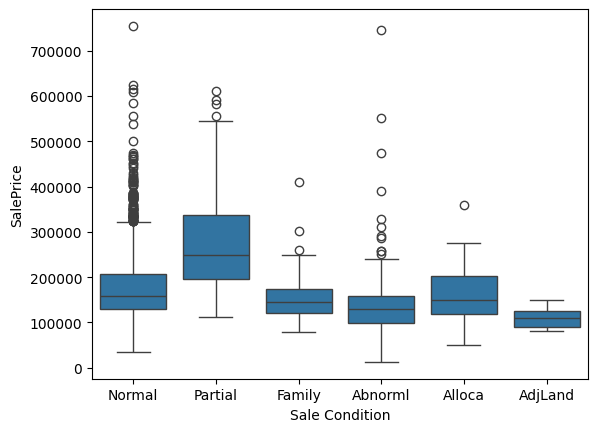

In [183]:
sns.boxplot(data = df, x='Sale Condition', y='SalePrice')

In [193]:
df=df.astype('float')

In [212]:
high_corr_columns= df.corr()['SalePrice'][np.abs(df.corr()['SalePrice'])>0.3].index.tolist()

In [213]:
df[high_corr_columns]

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,...,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,60,NridgHt,New
0,6.0,1960.0,1960.0,112.0,1.0,3.0,639.0,1080.0,2.0,1656.0,...,7.0,2.0,2.0,528.0,210.0,62.0,215000.0,0.0,0.0,0.0
1,5.0,1961.0,1961.0,0.0,1.0,3.0,468.0,882.0,3.0,896.0,...,5.0,0.0,1.0,730.0,140.0,0.0,105000.0,0.0,0.0,0.0
2,6.0,1958.0,1958.0,108.0,1.0,3.0,923.0,1329.0,3.0,1329.0,...,6.0,0.0,1.0,312.0,393.0,36.0,172000.0,0.0,0.0,0.0
3,7.0,1968.0,1968.0,0.0,2.0,3.0,1065.0,2110.0,5.0,2110.0,...,8.0,2.0,2.0,522.0,0.0,0.0,244000.0,0.0,0.0,0.0
4,5.0,1997.0,1998.0,0.0,1.0,4.0,791.0,928.0,4.0,928.0,...,6.0,1.0,2.0,482.0,212.0,34.0,189900.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6.0,1984.0,1984.0,0.0,1.0,3.0,819.0,1003.0,3.0,1003.0,...,6.0,0.0,2.0,588.0,120.0,0.0,142500.0,0.0,0.0,0.0
2926,5.0,1983.0,1983.0,0.0,1.0,4.0,301.0,864.0,3.0,902.0,...,5.0,0.0,2.0,484.0,164.0,0.0,131000.0,0.0,0.0,0.0
2927,5.0,1992.0,1992.0,0.0,1.0,4.0,337.0,912.0,3.0,970.0,...,6.0,0.0,0.0,0.0,80.0,32.0,132000.0,0.0,0.0,0.0
2928,5.0,1974.0,1975.0,0.0,1.0,4.0,1071.0,1389.0,4.0,1389.0,...,6.0,1.0,2.0,418.0,240.0,38.0,170000.0,0.0,0.0,0.0


In [214]:
for col in high_corr_columns:
  corr, p = pearsonr(df[col], df['SalePrice'])
  print(f'Correlation of {col} is: {corr}, and p-value is {p}')

Correlation of Overall Qual is: 0.7992617947690233, and p-value is 0.0
Correlation of Year Built is: 0.5584261057120455, and p-value is 6.293707782619393e-240
Correlation of Year Remod/Add is: 0.5329737540266951, and p-value is 9.550218404536884e-215
Correlation of Mas Vnr Area is: 0.5057840813924535, and p-value is 4.0078349455511793e-190
Correlation of Exter Qual is: 0.6979699339863418, and p-value is 0.0
Correlation of Bsmt Qual is: 0.6792629106563136, and p-value is 0.0
Correlation of BsmtFin SF 1 is: 0.4331473123581195, and p-value is 2.6394309672690545e-134
Correlation of Total Bsmt SF is: 0.6325288490320324, and p-value is 0.0
Correlation of Heating QC is: 0.45032465412429434, and p-value is 2.601173833262517e-146
Correlation of 1st Flr SF is: 0.6216760632702533, and p-value is 5.68725579805e-313
Correlation of Gr Liv Area is: 0.7067799209766279, and p-value is 0.0
Correlation of Full Bath is: 0.5456039005201107, and p-value is 5.69390101943819e-227
Correlation of Kitchen Qual i

In [215]:
df_final = df[high_corr_columns]

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [232]:
df_final.columns.astype(str)

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'SalePrice', '60', 'NridgHt', 'New'],
      dtype='object')

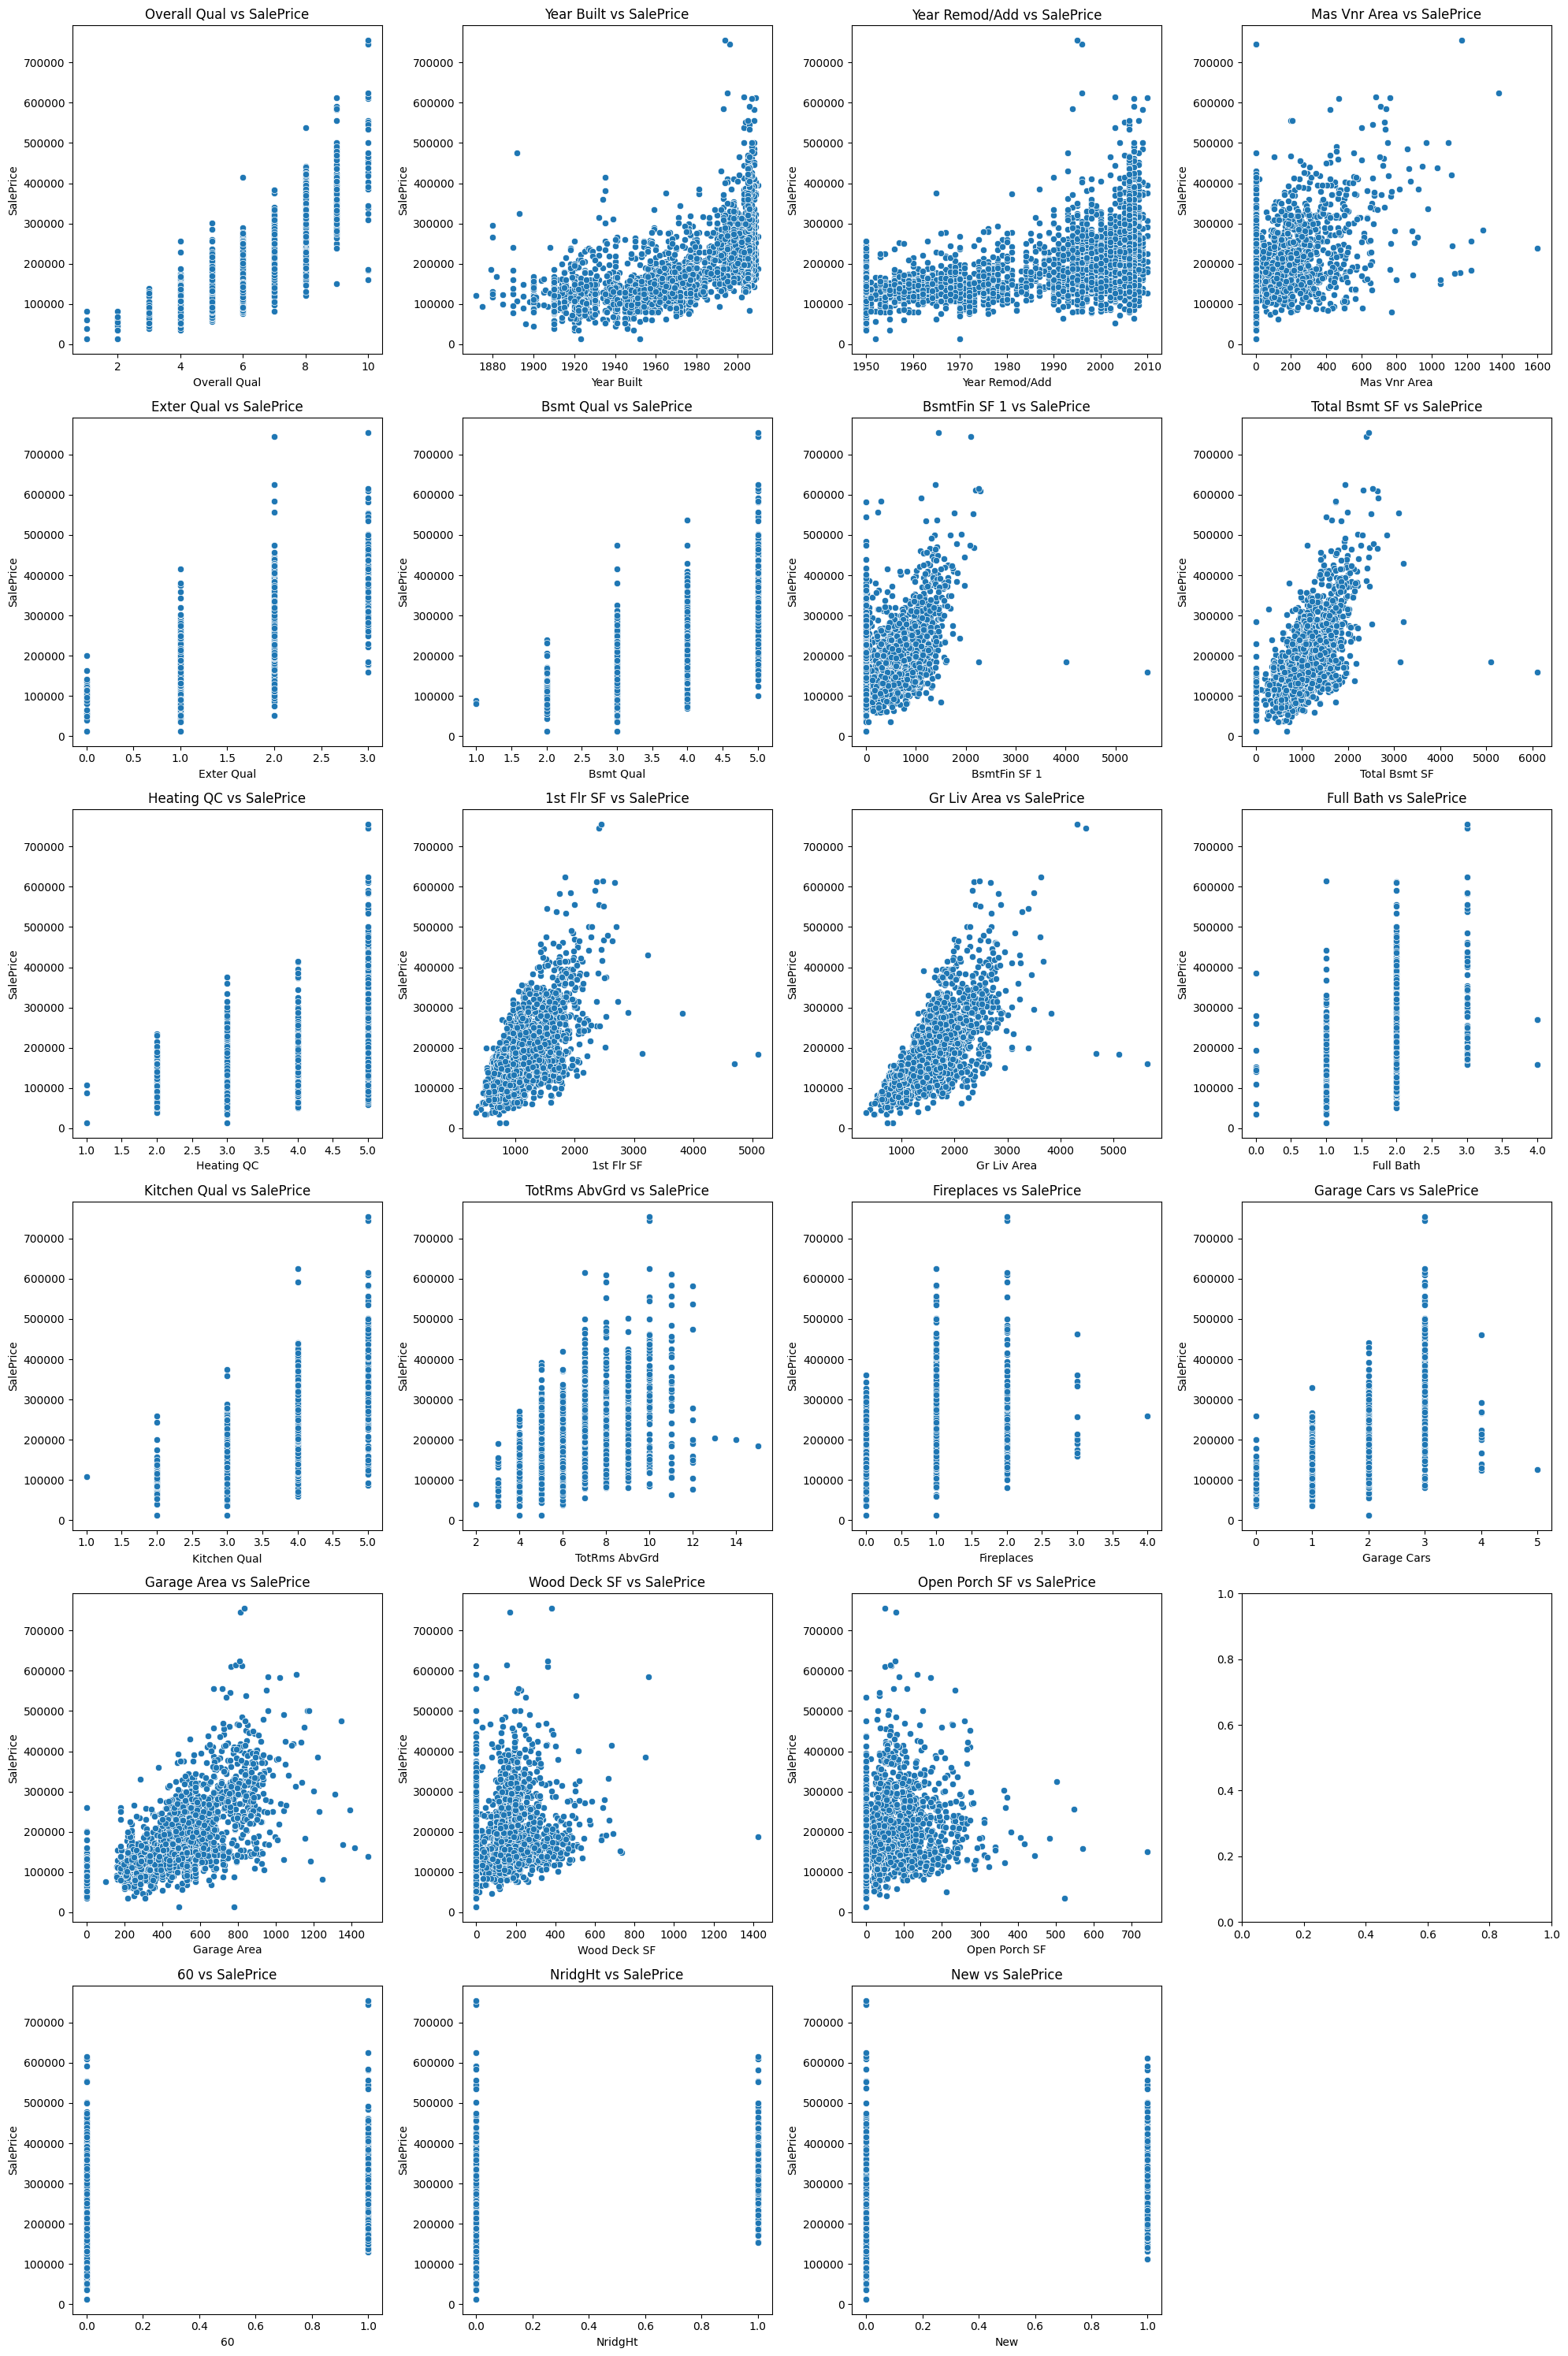

In [220]:
num_features = len(df_final.columns) - 1 # Exclude 'SalePrice'
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_final.columns):
    if col != 'SalePrice':
        sns.scatterplot(x=df_final[col], y=df_final['SalePrice'], ax=axes[i])
        axes[i].set_title(f'{col} vs SalePrice')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('SalePrice')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [235]:
from re import S
X = df_final.copy()
X.drop(['SalePrice'], axis =1, inplace = True)
y = df_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

ss= StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [237]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"R score for training:{lr.score(X_train,y_train)} and for testing: {lr.score(X_test,y_test)}")

R score for training:0.826864505650954 and for testing: 0.8634576789381615


In [246]:
ridge = Ridge()
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid = {'alpha' : [34,35,36]}, cv=5)

grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [34, 35, 36]})

In [252]:
grid_ridge = GridSearchCV(ridge, param_grid = {'alpha' : [14,15,16,17]}, cv=5)
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [14, 15, 16, 17]})

In [253]:
grid_ridge.best_estimator_.score(X_test,y_test)

0.8641808189283529

In [254]:
grid_lasso.best_estimator_.score(X_test,y_test)

0.8635451552085314

In [255]:
grid_lasso.best_estimator_.coef_

array([ 1.30430630e+04, -3.73171328e+01,  5.32308250e+01,  2.57541610e+01,
        8.77920812e+03,  1.24974590e+04,  1.60619148e+01,  5.38374634e+00,
        2.69311012e+03,  1.63283916e+01,  3.45286854e+01, -8.44603902e+02,
        1.10724402e+04,  3.67847277e+02,  7.12401154e+03,  5.47602037e+03,
        1.83333287e+01,  2.65421116e+01, -3.65204977e+01,  9.89310483e+03,
        2.77404818e+04,  8.51933849e+03])

In [256]:
from sklearn.metrics import mean_squared_error as mse

In [259]:
print(f'MSE of LR: {mse(y_test, lr.predict(X_test))}, of Ridge: {mse(y_test, grid_ridge.best_estimator_.predict(X_test))}, of Lass: {mse(y_test, grid_lasso.best_estimator_.predict(X_test))}' )

MSE of LR: 833355448.6509286, of Ridge: 828941925.823157, of Lass: 832821556.8438059


In [261]:
rf = RandomForestRegressor()
parameters = {"n_estimators": [40,60,100], "criterion": ['squared_error', 'absolute_error', 'friedman_mse'],
              "max_depth": [50,100], "max_features": ['sqrt', 'log2']}
grid_rf = GridSearchCV(rf, param_grid=parameters, cv = 5)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [40, 60, 100]})

In [263]:
print(f'MSE of RF:{mse(y_test, grid_rf.best_estimator_.predict(X_test))} and R^2 score: {grid_rf.best_estimator_.score(X_test,y_test)}')

MSE of RF:600742910.3099124 and R^2 score: 0.9015704145596601
